<a href="https://colab.research.google.com/github/Cehiim/InteligenciaArtificial/blob/main/Atv2/A2_Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402758, Cesar Hideki Imai' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

*Apresente um parágrafo resumindo o que é feito neste trabalho*.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **Pacotes**

In [ ]:
!pip install pyvis

## **1. Grafo das cidades (2,0)**

### Definindo cidades

In [ ]:
# Lista de cidades com as distâncias dos vizinhos
cidades = [
    {"nome": "São Paulo", "vizinhos": [0, 99, 72, 91, 313, 101, 326, 563, 232, 57, 18, 56]},
    {"nome": "Campinas", "vizinhos": [99, 0, 166, 150, 221, 86, 211, 450, 105, 42, 85, 145]},
    {"nome": "Santos", "vizinhos": [72, 166, 0, 128, 390, 165, 398, 626, 300, 114, 66, 100]},
    {"nome": "São José dos Campos", "vizinhos": [91, 150, 128, 0, 391, 175, 414, 653, 333, 148, 70, 43]},
    {"nome": "Ribeirão Preto", "vizinhos": [313, 221, 390, 391, 0, 297, 148, 281, 87, 271, 296, 374]},
    {"nome": "Sorocaba", "vizinhos": [101, 86, 165, 175, 297, 0, 230, 482, 177, 52, 97, 145]},
    {"nome": "Bauru", "vizinhos": [326, 211, 398, 414, 148, 230, 0, 273, 159, 264, 238, 345]},
    {"nome": "Presidente Prudente", "vizinhos": [563, 450, 626, 653, 281, 482, 273, 0, 349, 497, 482, 588]},
    {"nome": "São Carlos", "vizinhos": [232, 105, 300, 333, 87, 177, 159, 349, 0, 135, 210, 295]},
    {"nome": "Jundiaí", "vizinhos": [57, 42, 114, 148, 271, 52, 264, 497, 135, 0, 40, 113]},
    {"nome": "Guarulhos", "vizinhos": [18, 85, 66, 70, 296, 97, 238, 482, 210, 40, 0, 58]},
    {"nome": "Mogi das Cruzes", "vizinhos": [56, 145, 100, 43, 374, 145, 345, 588, 295, 113, 58, 0]},
]

In [ ]:
import pandas as pd

# Converter para um dataframe/tabela
df = pd.DataFrame(cidades)

# Expandir a lista de vizinhos de cada cidade e nomear cada cidade vizinha
df = df.join(pd.DataFrame(df.pop("vizinhos").to_list(), columns=[cidades[i]["nome"] for i in range(12)])) #
df

,nome,São Paulo,Campinas,Santos,São José dos Campos,Ribeirão Preto,Sorocaba,Bauru,Presidente Prudente,São Carlos,Jundiaí,Guarulhos,Mogi das Cruzes
0,São Paulo,0,99,72,91,313,101,326,563,232,57,18,56
1,Campinas,99,0,166,150,221,86,211,450,105,42,85,145
2,Santos,72,166,0,128,390,165,398,626,300,114,66,100
3,São José dos Campos,91,150,128,0,391,175,414,653,333,148,70,43
4,Ribeirão Preto,313,221,390,391,0,297,148,281,87,271,296,374
5,Sorocaba,101,86,165,175,297,0,230,482,177,52,97,145
6,Bauru,326,211,398,414,148,230,0,273,159,264,238,345
7,Presidente Prudente,563,450,626,653,281,482,273,0,349,497,482,588
8,São Carlos,232,105,300,333,87,177,159,349,0,135,210,295
9,Jundiaí,57,42,114,148,271,52,264,497,135,0,40,113


### Definindo grafo

Função para adicionar vértices no grafo interativo

In [ ]:
def imprimirVertices(grafo, n, cidades):
  for i in range(n):

    # Adiciona vértices
    grafo.add_node(
        i,
        title=cidades[i]["nome"],
        label=cidades[i]["nome"],
        color="white"
        )

Função para adicionar arestas no grafo interativo

In [ ]:
def imprimirArestas(grafo, n, cidades):
  for i in range(n):
    for j in range(n):
      peso = cidades[i]["vizinhos"][j]

      if(peso != 0):

        # Adiciona as arestas
        grafo.add_edge(
            i,
            j,
            value=800/peso,
            length=8*peso,
            smooth=False,
            title=f'''
            {cidades[i]["nome"]} ---- {cidades[j]["nome"]}
            Distância: {peso}
            ''',
            color="yellow"
            )

Definindo grafo interativo

In [ ]:
from pyvis.network import Network

#Criar grafo
grafo = Network(notebook=True, cdn_resources='in_line', directed=False, height="1200px", width="100%", bgcolor="black", font_color="white")

imprimirVertices(grafo, 12, cidades)
imprimirArestas(grafo, 12, cidades)

# Salvar o grafo (Não é possível mostrar o grafo diretamente pelo Jupyter Notebook)
grafo.show("grafo.html")

grafo.html


> ## **1.1. Resultados (Testes)**

Para acessar o resultado, é necessário baixar o arquivo `grafo.html` e abrir.

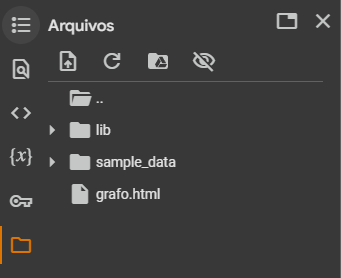

O grafo feito com a biblioteca Pyvis possibilita uma maior interatividade. Além disso, tanto a distância, quanto a grossura das arestas são proporcionais aos valores dos pesos.

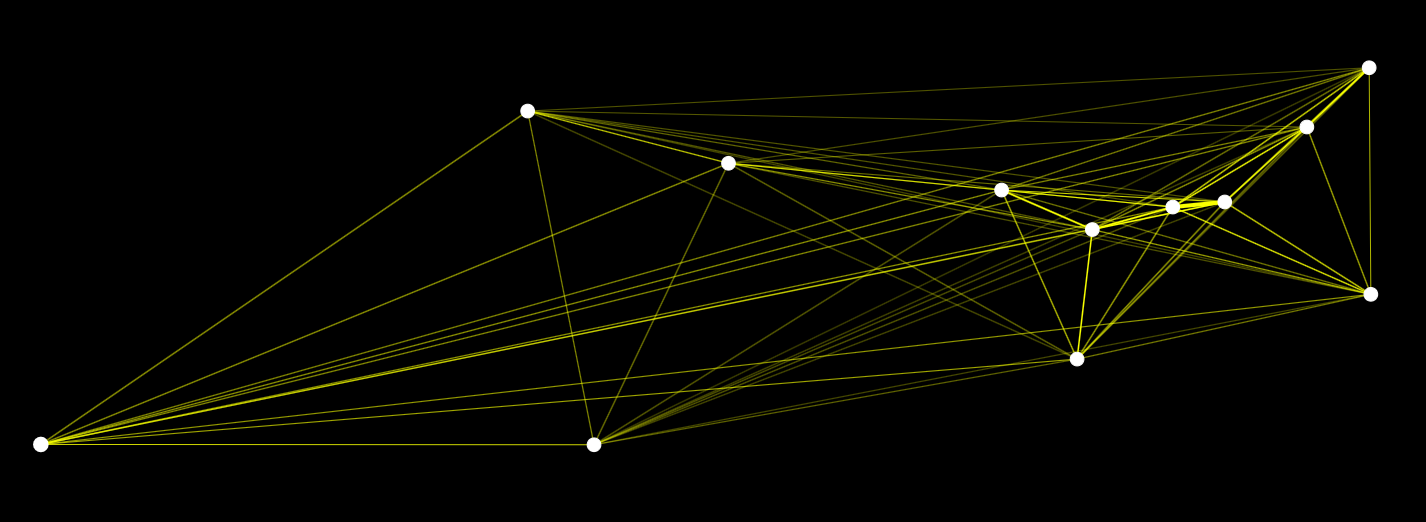

É possível dar zoom.

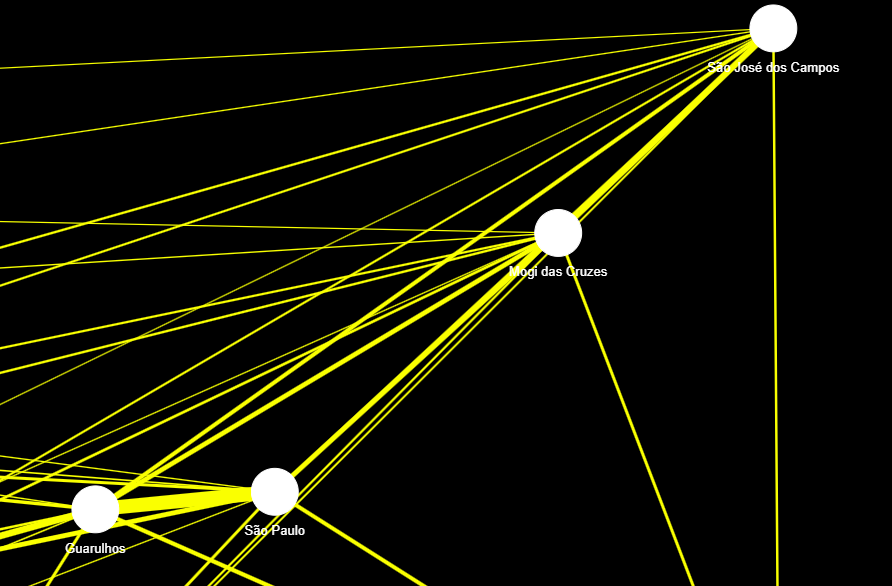

E também visualizar o valor de cada aresta encostando com o cursor.

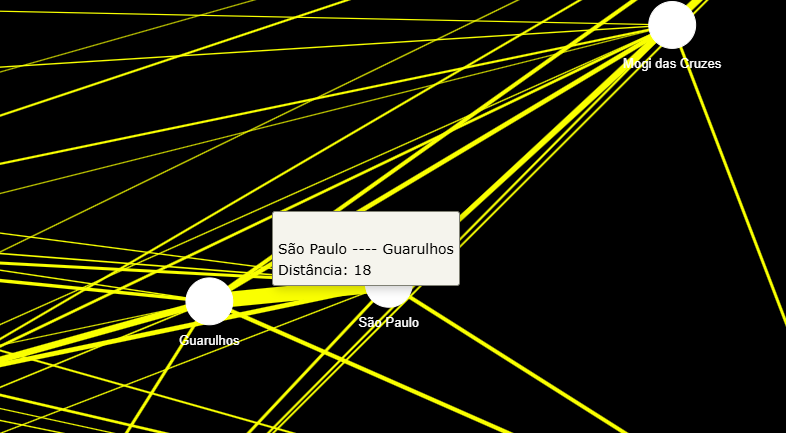

## **2. BFS, Breadth-First Search(2,0)**

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

## **3. Busca Informada (5,0)**

O algoritmo informado que será empregado na Entrega final será o Dijkstra. Porque o grafo escolhido apresenta apenas 12 vértices, o que torna o grafo relativamente pequeno. Também todos os pesos de arestas são positivos, o que é conveniente para o algoritmo. Além disso, todas as cidades se conectam entre si, portanto o grafo também é densamente conectado.

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

DIJIKSTRA'S ALGORITHM IN 3 MINUTES. Michael Sambol, 2014. Disponível em: https://youtu.be/_lHSawdgXpI?si=BuVkUr-3MnL6YE3B. Acesso em: 19 mar. 2025.

PYVIS. Documentation. Disponível em: https://pyvis.readthedocs.io/en/latest/documentation.html. Acesso em: 19 mar. 2025.


---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 9 #@param {type:"slider", min:0, max:10, step:1}

BFS = 6 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
